<a href="https://colab.research.google.com/github/krishna-d114/car-sales-analysis/blob/main/car_sales_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:


# Correct Google Sheets CSV URL
sheet_id = "1DGvuAwNjr7NOQb8XvN1hN2ERa4hOpy__LKKyiOrO1-Q"
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

# Load into Pandas
df = pd.read_csv(csv_url)

# Show the first 5 rows
df.head()


,Make,Model,January,February,March,April,May,June,July,August,...,October,November,December,Total,Segment,Body Type,MoM %,YoY %,Unnamed: 19,Unnamed: 20
0,Citroen,Basalt,0,0,0,0,0,0,0,579,...,221,47,79,1267,C2,SUV,68,0,NaN,NaN
1,Citroen,C3,234,211,265,251,155,77,90,507,...,300,200,300,2890,C1,Hatchback,50,-3,NaN,NaN
2,Citroen,Aircross,231,127,211,93,125,136,68,38,...,103,201,96,1470,C2,SUV,-52,-72,NaN,NaN
3,Citroen,C5 Aircross,1,0,0,1,0,0,0,1,...,4,0,1,9,D2,SUV,0,-50,NaN,NaN
4,Citroen,e-C3,184,83,530,59,235,126,177,150,...,89,61,90,1812,C1,SUV,48,0,NaN,NaN


In [ ]:
df.columns

Index(['Make', 'Model', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Total', 'Segment', 'Body Type', 'MoM %', 'YoY %', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

#SALES TRENDS



SALES ACROSS ALL MONTHS

In [ ]:

months=['January','February','March','April','May','June','July','August','September','October','November','December']
df[months]=df[months].apply(pd.to_numeric,errors='coerce').fillna(0).astype(int)#to convert all values to int and if there are any invalid values, they will be converted to 0.
total_monthly_sales=df[months].sum()#creates a series with sums as values and months as indices
print(total_monthly_sales)


January      8258
February     6823
March        9381
April        6893
May          7956
June         7234
July         7990
August       7867
September    9795
October      6740
November     8650
December     9830
dtype: int64


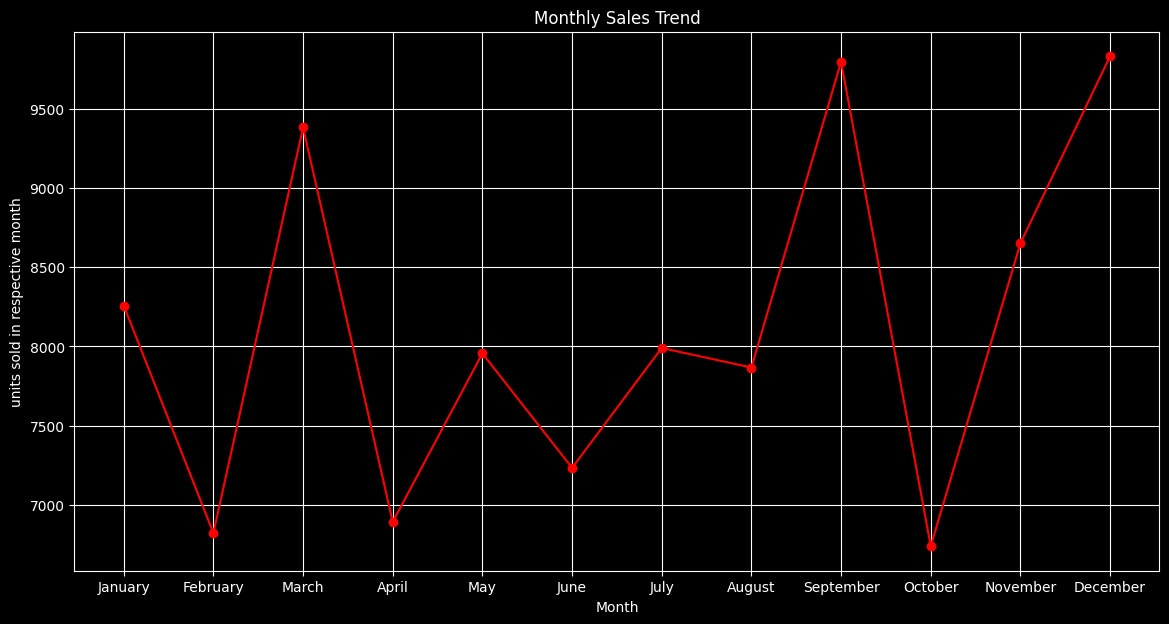

In [ ]:
#now lets plot the graph:
plt.figure(figsize=(14,7))
plt.plot(total_monthly_sales.index,total_monthly_sales.values,marker='o',linestyle='-',color='r')
plt.style.use("dark_background")
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('units sold in respective month')
plt.grid(True)# this is for grid
plt.show()

In [ ]:
df['YoY %']=pd.to_numeric(df['YoY %'],errors='coerce')#here we are converting the string data into numeric data
positive_growth_df=df[df['YoY %'] > 0][['Make', 'Model', 'YoY %']]#making a seperate dataframe, in that we are including the make,model and yoy's and the rows are different car models.
negative_growth_df=df[df['YoY %'] < 0][['Make', 'Model', 'YoY %']]#similarly, creating a dataframe.
print("positive growth:")
print(positive_growth_df)
print("")
print("negative growth:")
print(negative_growth_df)



positive growth:
          Make                          Model  YoY %
5        Honda                          Amaze     54
8      Hyundai                           Aura      1
9      Hyundai                        Alcazar     41
10     Hyundai                          Creta     36
18     Hyundai                          Verna     22
22         Kia                         Carens      2
24         Kia                            EV6    917
26         Kia                          Sonet  33270
29    Mahindra                        Scorpio      7
30    Mahindra                           Thar     32
31    Mahindra                XUV300, XUV 3X0     97
32    Mahindra                         XUV400    142
33    Mahindra                         XUV700     25
34      Maruti                           Alto    197
36      Maruti                         Brezza     35
37      Maruti                        Celerio    203
39      Maruti                          Dzire     18
40      Maruti               

In [ ]:
# lets calculate how many positive growth and negative growth models each company has
positive_growth_counts=positive_growth_df['Make'].value_counts()
negative_growth_counts=negative_growth_df['Make'].value_counts()
print("positive growth:")
print(positive_growth_counts)
print("")
print("negative growth:")
print(negative_growth_counts)

positive growth:
Make
Maruti        13
Mahindra       5
Hyundai        4
Kia            3
Toyota         3
Renault        2
Tata           2
Honda          1
MG             1
Volkswagen     1
Name: count, dtype: int64

negative growth:
Make
Hyundai       6
Tata          5
Toyota        5
Maruti        4
MG            4
Citroen       3
Skoda         3
Honda         2
Jeep          2
Mahindra      2
Volkswagen    2
Kia           1
Nissan        1
Renault       1
Name: count, dtype: int64


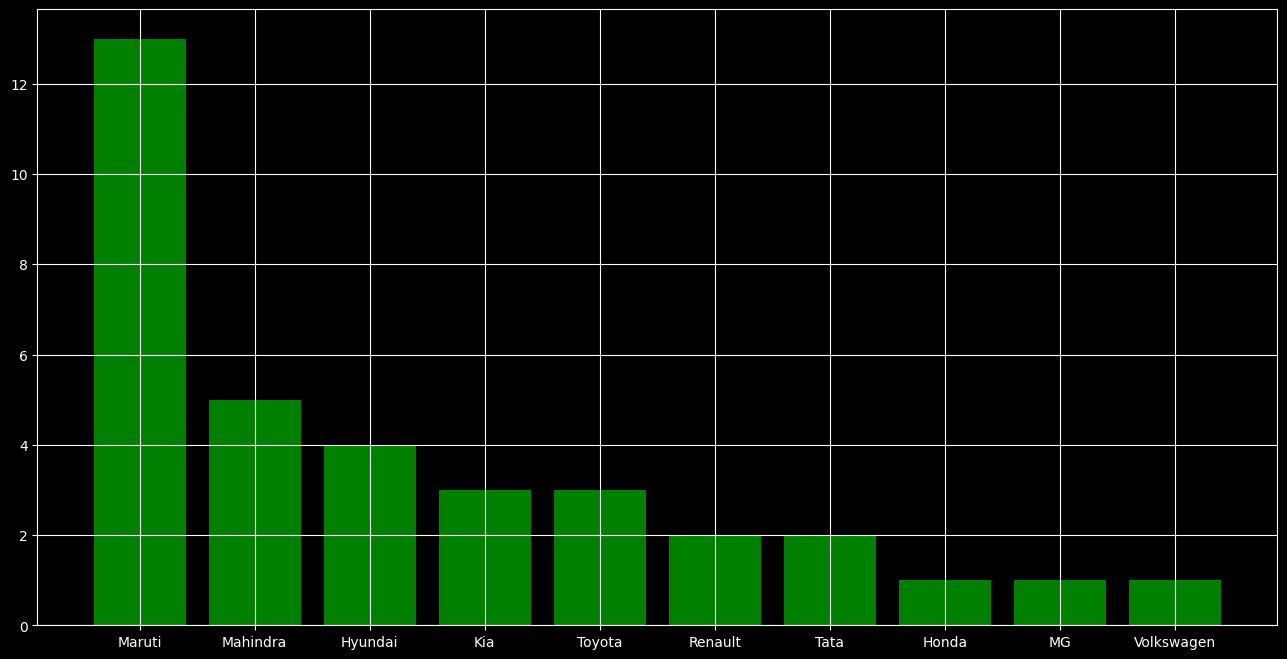

In [ ]:
#now lets plot
plt.figure(figsize=(16,8))
plt.bar(positive_growth_counts.index,positive_growth_counts.values,color='g',label='positive growth')
plt.grid(True)


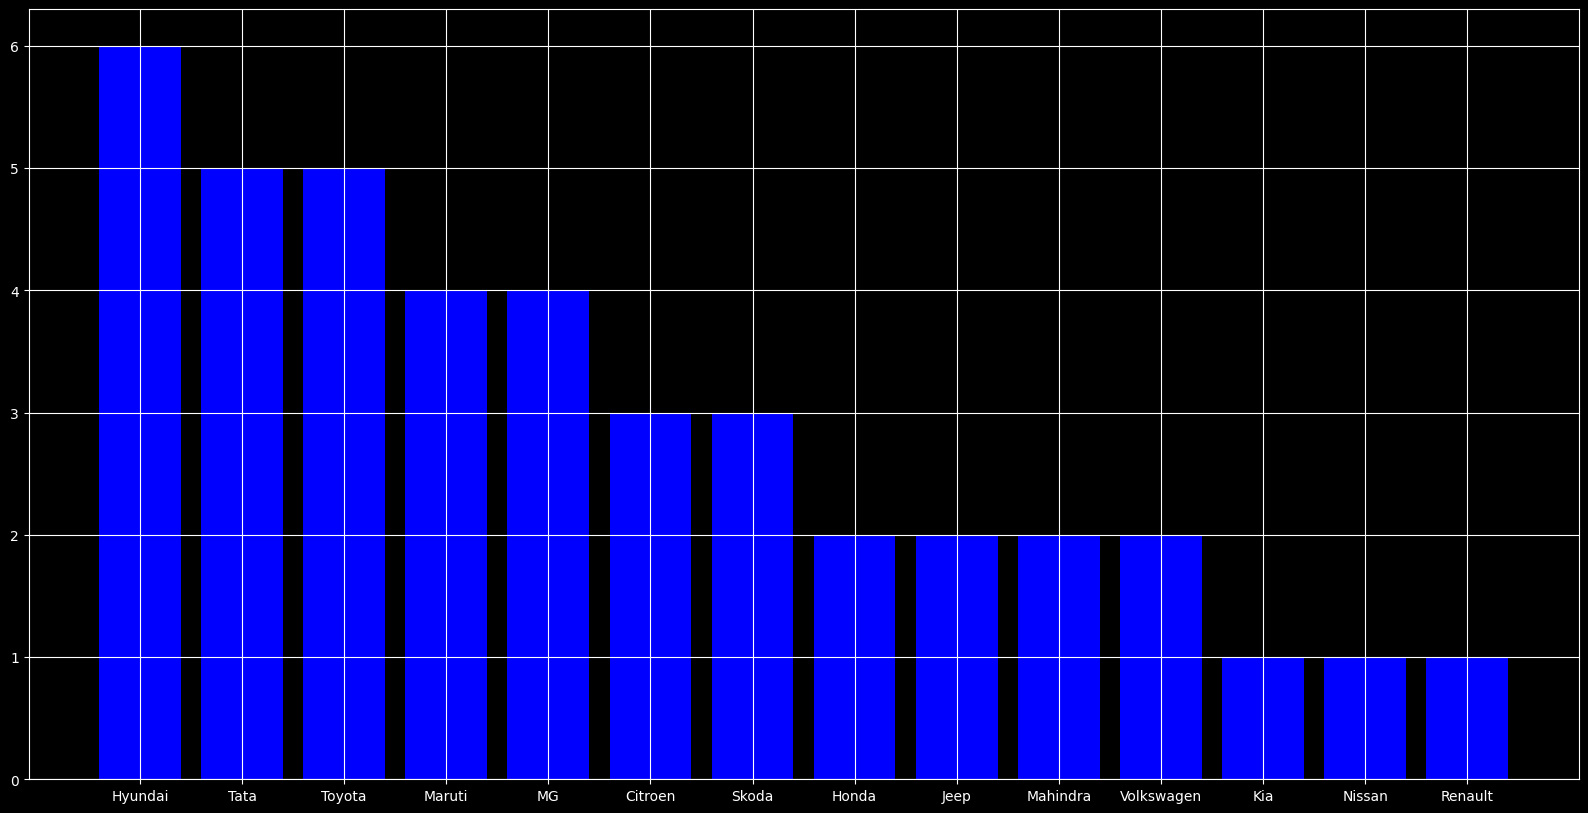

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(negative_growth_counts.index,negative_growth_counts.values,color='b',label='negative growth')
plt.grid(True)

In [ ]:
import seaborn as sns

<ipython-input-40-05f27153b5d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=make_sales.index, y=make_sales.values, palette="viridis")


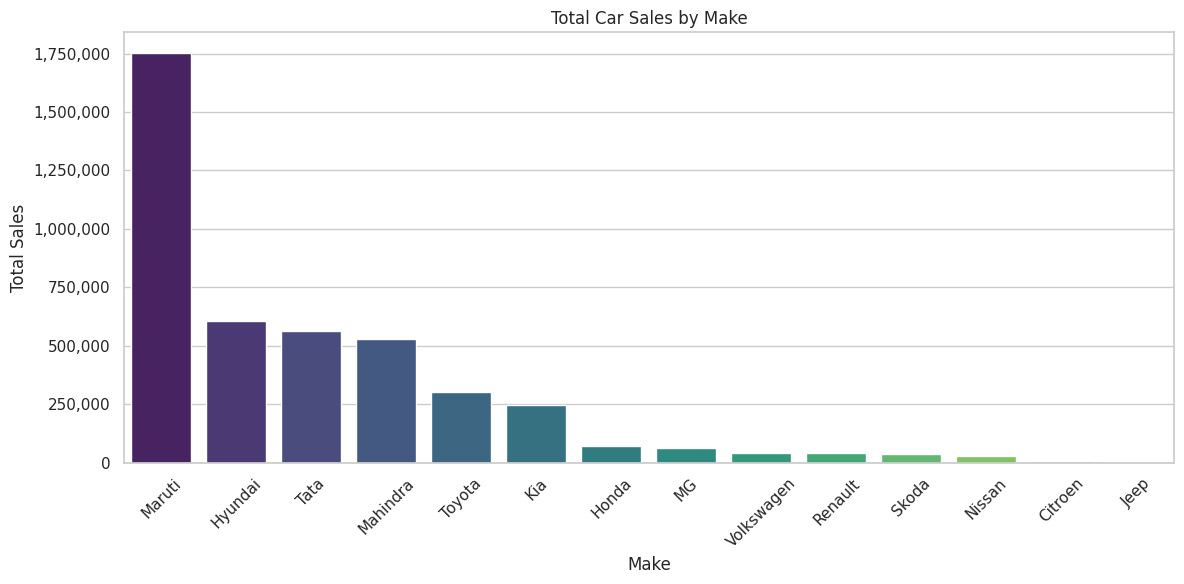

In [ ]:
#using seaborn, we have just visualized the total vehicle sales of each make
# Ensure 'Total' column is numeric
df['Total'] = pd.to_numeric(df['Total'].replace({',': ''}, regex=True), errors='coerce')

# Aggregate data by Make
make_sales = df.groupby('Make')['Total'].sum().sort_values(ascending=False)

# Plot with clean formatting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=make_sales.index, y=make_sales.values, palette="viridis")
plt.title("Total Car Sales by Make")
plt.xlabel("Make")
plt.ylabel("Total Sales")

# Format y-axis with thousands separator
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

